# Aula 1

## Introdução ao OCR

### O que é o OCR? 

OCR, que em inglês é chamado de Optical Character Recognition e tem a sua tradução para Reconhecimento de Caractere Óptico, e dá se ao processo que converte uma imagem de texto em um formato de texto legível por máquina

### Como o OCR funciona?
* Aquisição da imagem
* Pré-processamento
* Reconhecimento de texto
  - Reconhecimento de padrões
  - Detecção de recursos
* Pós-processamento



Existem diversas ferramentas disponíveis para serem utilizadas e nós vamos utilizar o [`pytesseract`](https://pypi.org/project/pytesseract/), que é uma biblioteca do Python que permite com que possamos utilizar o [`Tesseract OCR`](https://tesseract-ocr.github.io/), que é um recurso open source da Google e funciona com a OCR Engine. Por ser um recurso open source tem um [`repositório no GitHub`](https://github.com/tesseract-ocr/tesseract), e mais de 100 línguas no seu vocabulário, além de ser possível fazer com que ele aprenda novas linguagens.

## OCR no Colab

As bibliotecas não são instaladas previamente no Google Colaboratory, então é necessário que a instalação seja feita utilizando o pip.



```
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9
```

E os dados utilizados no curso serão importados utilizando o `!git clone` da pasta [`text-recognize`](https://github.com/sthemonica/text-recognize), afim de facilitar a importação de arquivos.

In [1]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.2.17, 3.4.3.18, 3.4.4.19, 3.4.5.20, 3.4.6.27, 3.4.7.28, 3.4.8.29, 3.4.9.31, 3.4.9.33, 3.4.10.35, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.0.0.21, 4.0.1.23, 4.0.1.24, 4.1.0.25, 4.1.1.26, 4.1.2.30, 4.2.0.32, 4.2.0.34, 4.3.0.36, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:

In [2]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 103 (delta 12), reused 96 (delta 9), pack-reused 0
Receiving objects: 100% (103/103), 11.98 MiB | 2.67 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow # para mostrar as imagens no Google Colab

In [4]:
pytesseract.__version__

'0.3.9'

In [5]:
cv2.__version__

'4.6.0'

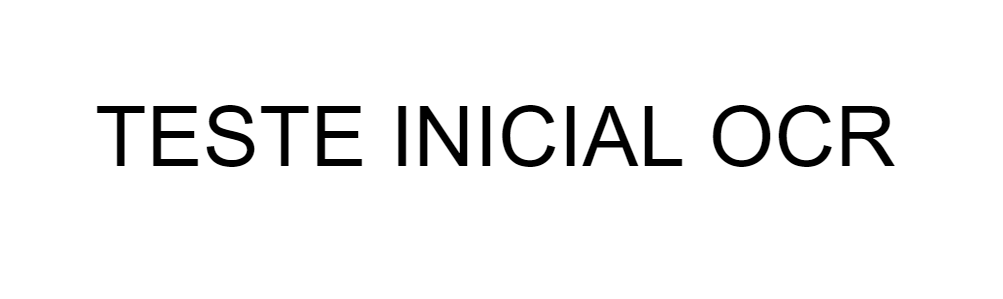

In [6]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
cv2_imshow(img)

In [7]:
texto = pytesseract.image_to_string(img)
print(texto)

TESTE INICIAL OCR



## Imagens BGR


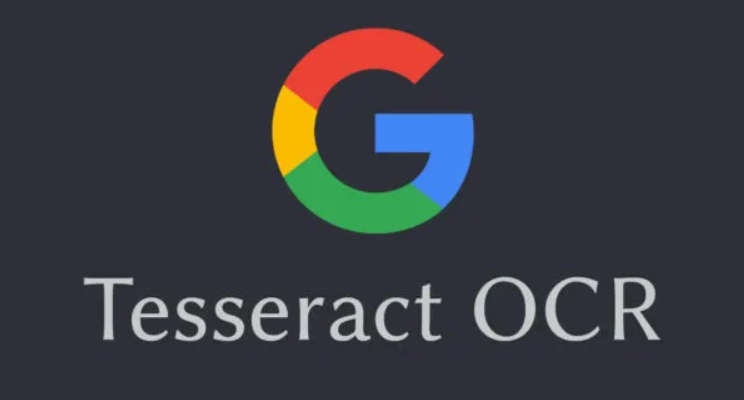

In [8]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
cv2_imshow(img)

O OpenCV tem seus canais de cores invertidos, então para utilizarmos com outras bibliotecas precisamos fazer a conversão de BGR para RGB. 
Existem outros tipos de conversões que podem ser feitas e a lista pode ser acessada no site da [documentação do OpenCV](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html).

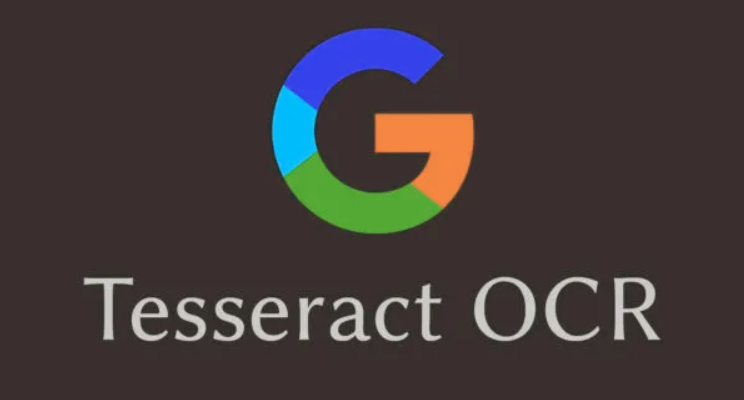

In [9]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

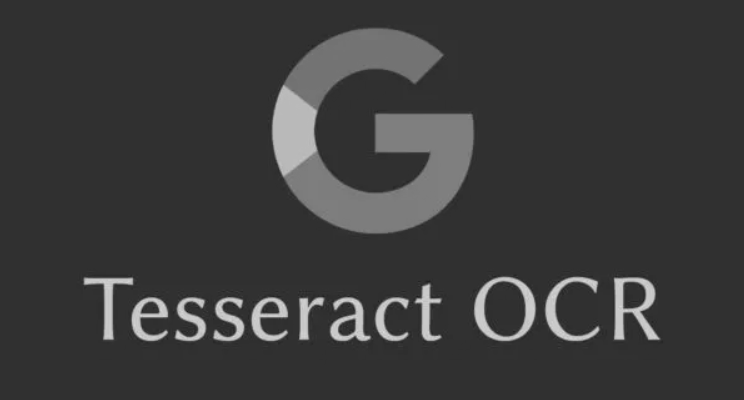

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [11]:
texto = pytesseract.image_to_string(rgb)
print(texto)

c

Tesseract OCR



In [12]:
texto = pytesseract.image_to_string(gray)
print(texto)

C

Tesseract OCR



# Aula 2

## Caracteres diferentes

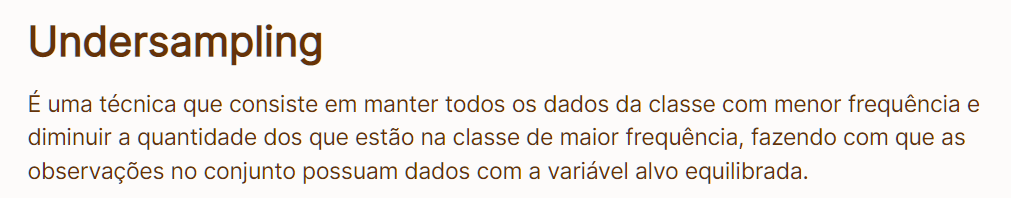

In [13]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-undersampling.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [14]:
texto = pytesseract.image_to_string(rgb)
print(texto)

Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



As palavras **frequência**, **estão** e **observações** não conseguiram ser traduzidas de uma forma boa o suficiente, o que nos faz pensar que o Tesseract está com algum problema e vamos verificar quais as listas de línguas que estão instaladas atualmente no sistema para auxiliar na leitura das nossas imagens, para isso usamos:

```
!tesseract --list-langs
```

In [15]:
!tesseract --list-langs

List of available languages (2):
osd
eng


In [16]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-por all 4.00~git24-0e00fe6-1.2 [856 kB]
Fetched 856 kB in 1s (1,240 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 155727 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-por (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-por (4.00~git24-0e00fe6-1.2) ...


In [17]:
!tesseract --list-langs

List of available languages (3):
osd
por
eng


Agora já temos o português instalado e podemos passar novamente a imagem e definir que ela seja "lida" pelo Tesseract usando o português, para isso contamos com o  método `lang`.

In [18]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



## Desafio - Pasta com as línguas usadas no projeto

Para um projeto maior, ao invés de importarmos todas as vezes da forma que fizemos anteriormente com o `!apt-get install tesseract-ocr-por`podemos fazer uma pasta dentro do Google Colab e baixar diretamente do [GitHub do Tesseract os modelos já treinados em determinados idiomas](https://github.com/tesseract-ocr/tessdata), então se por algum acaso eu esteja trabalhando com imagens que tenham **italiano**, posso ter esse modelo na pasta e apenas utilizá-lo.


In [19]:
!mkdir tessdata

In [20]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2022-08-10 17:46:21--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2022-08-10 17:46:22--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2022-08-10 17:46:22--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [21]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



In [22]:
!ls tessdata/

eng.traineddata  por.traineddata


## PSM

Page Segmentation Mode (PSM) ou em uma tradução livre modos de segmentação de página.

```
!tesseract --help-psm
```

In [23]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


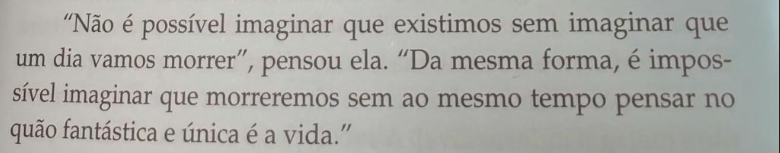

In [24]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-trecho-livro.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [25]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [26]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [27]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

In [28]:
config_tesseract = '--tessdata-dir tessdata --psm 8'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

ªfâ%êããããââª%%?ªííÉ:D;Z:Én:gíríãrgâgíie::ugfâ|



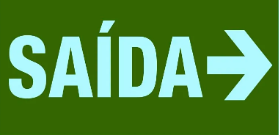

In [29]:
img = cv2.imread('/content/text-recognize/Imagens/Aula2-Saida.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [30]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDAS



## Biblioteca Pillow

Biblioteca Pillow, que é mais conhecida pelo seu nome antigo, **PIL**: Python Imaging Library. 

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

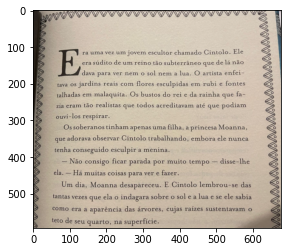

In [32]:
img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);

**Método utilizado:**

```
pytesseract.image_to_osd()
```


OSD significa Orientation and Script Detection e o seu retorno são os "metadados" da imagem.

In [33]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



# Aula 3

## Selecionando textos

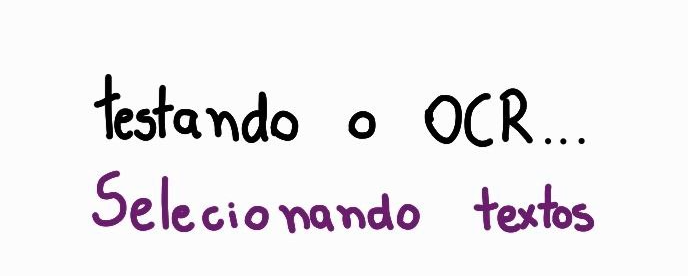

In [34]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [35]:
from pytesseract import Output

In [36]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos'],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2]}

- **block_num** = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- **conf** = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- **height** = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- **left** = coordenada x onde inicia a caixa delimitadora

- **level** = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- **line_num** = número da linha do que foi detectado (inicia com 0)

- **page_num** = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- **text** = o resultado do reconhecimento

- **top** = coordenada y onde a caixa delimitadora começa

- **width** = largura do bloco de texto atual detectado

- **word_num** = numero da palavra (indice) dentro do bloco atual

In [37]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

## Caixa delimitadora

In [45]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img

In [43]:
len(resultado['text'])

10

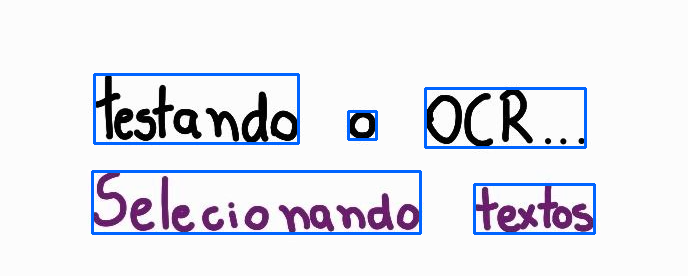

In [46]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)


## Caixa e texto

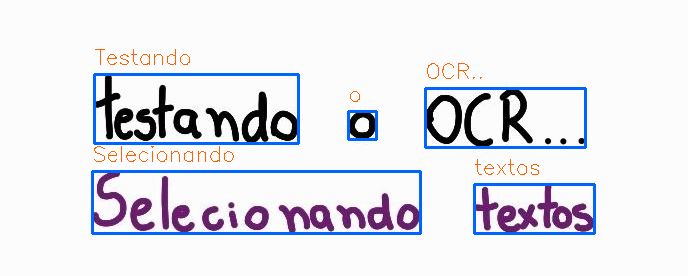

In [49]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))

cv2_imshow(img_copia)


## Fontes

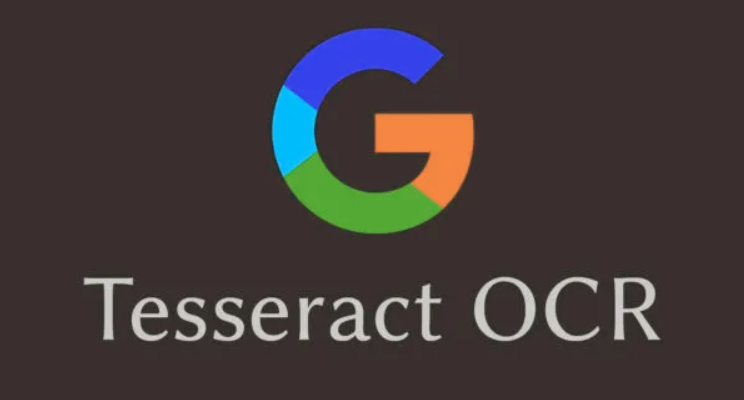

In [50]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [51]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR'],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2]}

In [52]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'

## Função para fontes

In [53]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

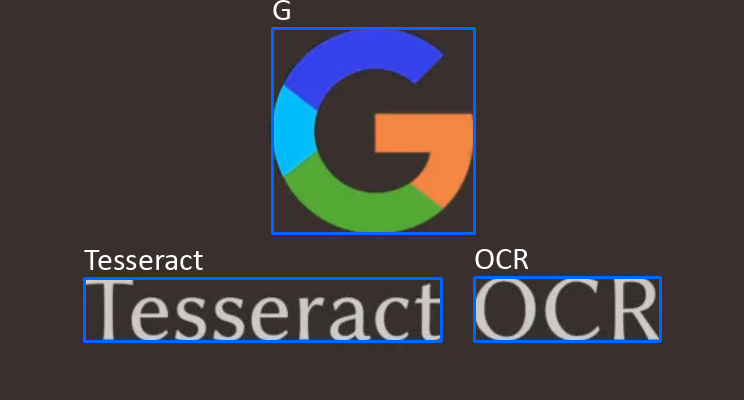

In [54]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
    
cv2_imshow(img_copia)


# Aula 4

## Busca de informações

Regular Expressions - RE

https://regexr.com/

In [55]:
import re

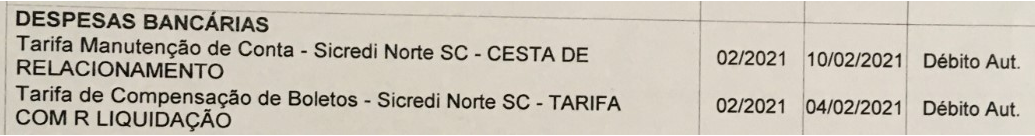

In [56]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [57]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  91,
  91,
  '-1',
  '-1',
  '-1',
  92,
  91,
  91,
  92,
  93,
  92,
  91,
  92,
  94,
  92,
  92,
  91,
  86,
  86,
  88,
  '-1',
  90,
  '-1',
  92,
  92,
  92,
  93,
  92,
  93,
  92,
  91,
  93,
  96,
  92,
  86,
  86,
  79,
  82,
  '-1',
  '-1',
  '-1',
  91,
  93,
  87],
 'height': [136,
  22,
  22,
  22,
  19,
  21,
  82,
  82,
  34,
  17,
  22,
  16,
  16,
  2,
  17,
  16,
  15,
  2,
  16,
  15,
  16,
  15,
  16,
  15,
  20,
  20,
  32,
  17,
  16,
  21,
  16,
  16,
  3,
  16,
  16,
  16,
  2,
  16,
  15,
  16,
  15,
  15,
  23,
  23,
  23,
  16,
  16,
  23],
 'left': [0,
  16,
  16,
  16,
  16,
  144,
  16,
  16,
  16,
  16,
  81,
  208,
  238,
  301,
  315,
  385,
  441,
  475,
  488,

In [58]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

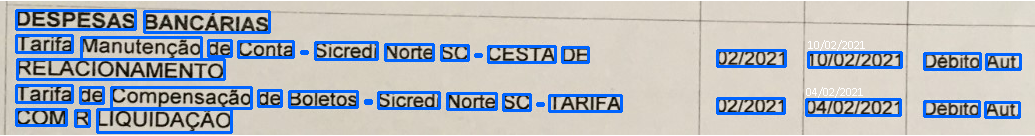

In [59]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)

cv2_imshow(img_copia)

## Destaque de informações

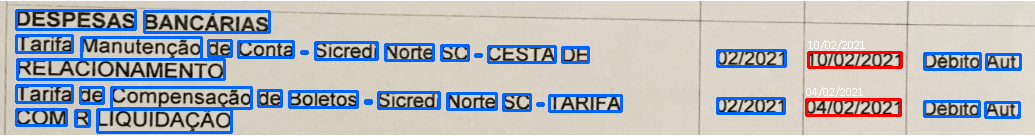

In [60]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)


cv2_imshow(img_copia)

In [61]:
datas

['10/02/2021', '04/02/2021']

## Cenários naturais

## Falsos positivos